In [2]:
import cv2           
import numpy as np   
import os            
from matplotlib import pyplot as plt



import time          
import mediapipe as mp  #pour la detection de corps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  




# Initialiser MediaPipe Holistic, qui est une solution pour la détection du corps entier
mp_holistic = mp.solutions.holistic 

# Initialiser MediaPipe Drawing Utils, qui contient des utilitaires pour dessiner les annotations
mp_drawing = mp.solutions.drawing_utils




def mediapipe_detection(image, model):
    # Convertir l'image de BGR en RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    
    # Rendre l'image non modifiable (non writeable)
    image.flags.writeable = False                  # Image is no longer writeable
    
    # Faire la prédiction en utilisant le modèle MediaPipe
    results = model.process(image)                 # Make prediction
    
    # Rendre l'image modifiable à nouveau
    image.flags.writeable = True                   # Image is now writeable
    
    # Convertir l'image de RGB en BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    
    # Retourner l'image et les résultats de la prédiction
    return image, results




def draw_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    # Dessiner les connexions de la main droite
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

    
# draw_landmarks -> Function does not return the image but rather applies the landmark visualizations to the current image in place    



def draw_styled_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             # Spécifications pour colorer les points de repère (points) du visage
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             # Spécifications pour colorer les connexions (lignes) du visage
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             # Spécifications pour colorer les points de repère (points) du corps
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) du corps
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main droite  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main droite
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main droite
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

    
#we are just formatting or updating our draw landmark function(that's not complusory though, u can use only standard drwa_landmark func)    
    



import cv2
import mediapipe as mp

# Initialiser la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Définir le modèle MediaPipe Holistic avec des seuils de détection et de suivi
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire le flux vidéo
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Faire les détections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les points de repère
        draw_styled_landmarks(image, results)  # Utiliser la fonction améliorée pour dessiner les points de repère avec des couleurs différentes
        
        # Afficher à l'écran
        cv2.imshow('OpenCV Feed', image)

        # Quitter proprement
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


# Compter le nombre de points de repère détectés sur la pose (corps)
num_pose_landmarks = len(results.pose_landmarks.landmark) 


results


# Appeler la fonction pour dessiner les points de repère sur le visage, le corps, et les mains
draw_landmarks(frame, results)




pose = []               
# Pour chaque point de repère de la pose détecté, crée un tableau numpy avec les coordonnées x, y, z et la visibilité, puis ajoute-le à la liste 'pose'.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)




# Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)



def extract_keypoints(results):
    # Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatène tous les tableaux de points de repère (pose, visage, main gauche, main droite) en un seul tableau numpy.
    return np.concatenate([pose, face, lh, rh])



result_test = extract_keypoints(results)



np.save('0', result_test)   
# en enregistrant chaque image sous forme de tableau numpy à l'intérieur de notre dossier 'MP_Data', nous aurons donc 30 tableaux numpy dans chaque dossier d'actions


np.load('0.npy')

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
actions = np.array([ 'n3ass','lunettes','je froid','3aslama', 'Chokran', 'Nhebbek', 'La',  'j aime', 'j aime pas', 'Nakel', 'Nchrob' ,  'Bahi',
      'Telephone',   's il te plait', 'pleur','fort', 'lissar','Waqtach',
    'Limine' , 'sghir', 'kbir', 'stop', 'sma3ni','fakar','chof'])





#Trente vidéos de données
no_sequences = 30

# Les vidéos dureront 30 images
sequence_length = 30


# Vérifie si le chemin de répertoire spécifié par DATA_PATH n'existe pas.
# Si le répertoire n'existe pas, il le crée.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)



# Itère sur chaque action dans la liste d'actions
for action in actions: 
    # Pour chaque action, itère sur le nombre de séquences
    for sequence in range(no_sequences):
        try:
            # Essaye de créer un répertoire pour l'action et la séquence spécifiée dans DATA_PATH
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            # Ignore les erreurs (par exemple, si le répertoire existe déjà) et continue
            pass



label_map = {label:num for num, label in enumerate(actions)}




# Initialise deux listes vides pour stocker les séquences et les étiquettes
sequences, labels = [], []

# Itère à travers chaque action dans la liste d'actions
for action in actions:
    # Pour chaque action, itère à travers chaque séquence (vidéo)
    for sequence in range(no_sequences):
        # Crée une liste pour stocker les frames de la séquence actuelle
        window = []
        # Itère à travers chaque frame de la séquence
        for frame_num in range(sequence_length):
            # Charge les points de repère extraits (au format .npy) pour la frame courante
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Ajoute les points de repère à la fenêtre (séquence)
            window.append(res)
        # Ajoute la fenêtre (séquence complète) à la liste des séquences
        sequences.append(window)
        # Ajoute l'étiquette correspondant à l'action à la liste des étiquettes
        labels.append(label_map[action])


X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

# Définir un modèle de réseau de neurones convolutifs 1D (CNN 1D)
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Dropout(0.3),
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(2),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Définir les paramètres du modèle
input_shape = (sequence_length, X_train.shape[2])
num_classes = len(actions)

# Créer le modèle
model = create_model(input_shape, num_classes)

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Définir les callbacks pour TensorBoard
log_dir = os.path.join('Logs')
tensorboard_callback = TensorBoard(log_dir=log_dir)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

# Sauvegarder le modèle entraîné
model.save('RNU.h5')


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.0542 - loss: 3.3671 - val_accuracy: 0.0263 - val_loss: 3.1836
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0761 - loss: 3.0910 - val_accuracy: 0.0263 - val_loss: 3.1230
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1151 - loss: 3.0130 - val_accuracy: 0.0526 - val_loss: 3.0250
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1215 - loss: 2.9593 - val_accuracy: 0.0526 - val_loss: 3.0270
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1269 - loss: 2.9383 - val_accuracy: 0.0526 - val_loss: 2.9870
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1178 - loss: 2.8967 - val_accuracy: 0.0526 - val_loss: 2.9319
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1354 - loss: 2.8931 - val_accuracy: 0.0526 - val_loss: 2.8978
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1427 - loss: 2.7459 - val_accuracy: 0.

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Prédictions du modèle de réseau de neurones
yhat = model.predict(X_test)

# Convertir les prédictions et les vérités terrain de one-hot en étiquettes
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

# Calculer les métriques
accuracy = accuracy_score(ytrue, yhat)
precision = precision_score(ytrue, yhat, average='weighted')
recall = recall_score(ytrue, yhat, average='weighted')
f1 = f1_score(ytrue, yhat, average='weighted')
conf_matrix = confusion_matrix(ytrue, yhat)

# Afficher les métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(ytrue, yhat))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.15789473684210525
Precision: 0.11842105263157894
Recall (Sensitivity): 0.15789473684210525
F1 Score: 0.13082706766917293
Confusion Matrix:
 [[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 2 0 0 0 0 0]


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

: 

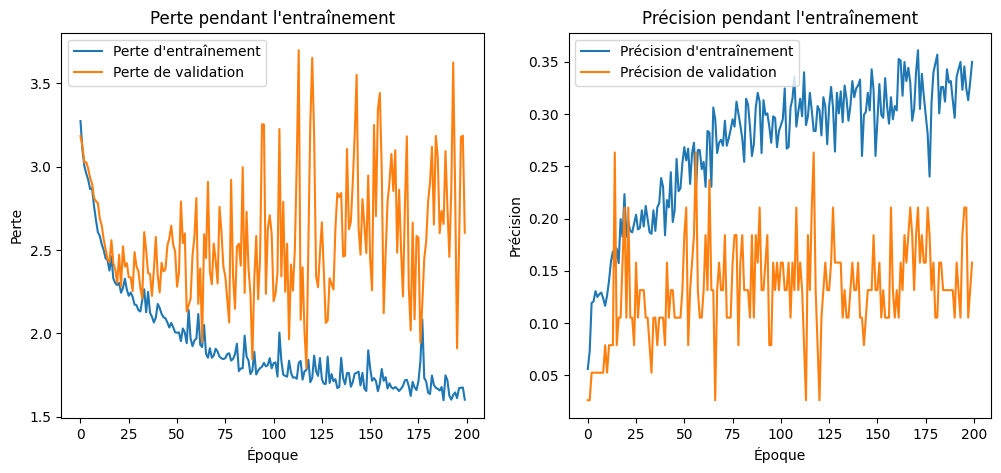

In [5]:
import matplotlib.pyplot as plt

# Tracer la perte
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

# Tracer la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision pendant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.75      1.00      0.86         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          18       0.25      1.00      0.40         1
          19      

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

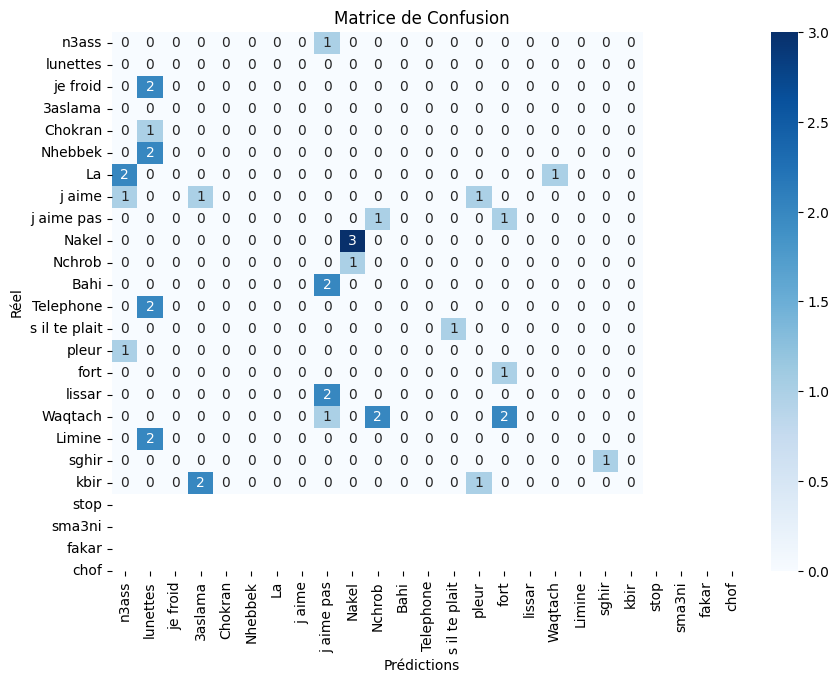

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prédire les classes pour les données de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Afficher les métriques
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Visualiser la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


In [7]:
colors = [(245,117,16), (117,245,16), (16,117,245)]* (len(actions) // 3 + 1)
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


sequences = np.array(sequences, dtype=np.float32)  # Assurez-vous que toutes les séquences sont en float32
sequences = sequences[::-1]  # Reverses the entire sequences array

print(sequences)

sequences = np.array(sequences, dtype=np.float32)  # Ensure all sequences are in float32
for seq in sequences:
    print(len(seq))



sequence = np.append(sequence, 'def')
print(sequence)


sequences = sequences[::-1] 


sequence[-20:]




# 1. Variables pour la détection des gestes
sequence = []            # Liste pour stocker les séquences de points clés
sentence = []            # Liste pour stocker les actions détectées successivement
predictions = []        # Liste pour stocker les prédictions du modèle
threshold = 0.8          # Seuil de confiance pour valider une prédiction

# Ouvrir la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Initialiser le modèle Mediapipe pour la détection des gestes
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire une image du flux vidéo
        ret, frame = cap.read()

        # Effectuer des détections sur l'image
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les repères sur l'image
        draw_styled_landmarks(image, results)
        
        # 2. Logique de prédiction
        keypoints = extract_keypoints(results)  # Extraire les points clés de l'image
        sequence.append(keypoints)             # Ajouter les points clés à la séquence
        sequence = sequence[-20:]              # Conserver seulement les 20 derniers frames
        
        if len(sequence) == 20:                # Si la séquence contient 20 frames
            res = model.predict(np.expand_dims(sequence, axis=0))[0]  # Prédire l'action à partir de la séquence
            print(actions[np.argmax(res)])    # Afficher l'action prédite
            predictions.append(np.argmax(res))  # Ajouter la prédiction à la liste des prédictions
            
            # 3. Logique de visualisation
            if np.unique(predictions[-10:])[0] == np.argmax(res):  # Si la prédiction dominante sur les 10 derniers frames est constante
                if res[np.argmax(res)] > threshold:  # Vérifier si la probabilité est au-dessus du seuil
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:  # Ajouter l'action à la sentence si elle est différente de la précédente
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])  # Ajouter la première action détectée à la sentence

            if len(sentence) > 5:  # Limiter la taille de la sentence à 5 actions
                sentence = sentence[-5:]

            # Visualiser les probabilités de chaque action
            image = prob_viz(res, actions, image, colors)
            
        # Dessiner un fond coloré et ajouter le texte de la sentence sur l'image
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Afficher l'image avec les visualisations
        cv2.imshow('OpenCV Feed', image)

        # Quitter la boucle lorsque la touche 'q' est pressée
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer toutes les fenêtres ouvertes
cap.release()
cv2.destroyAllWindows()


cap.release()
cv2.destroyAllWindows()


res[np.argmax(res)] > threshold

model.predict(np.expand_dims(X_test[0], axis=0))

[[[ 0.5160182   0.4524754  -1.0802364  ...  0.45198488  0.69363344
   -0.00785414]
  [ 0.5160037   0.4525295  -1.067734   ...  0.45351848  0.6975571
   -0.01019249]
  [ 0.5159935   0.45164716 -1.1196542  ...  0.45211238  0.69272876
   -0.00923952]
  ...
  [ 0.51605225  0.4523972  -1.1294849  ...  0.4531132   0.69589317
   -0.00204419]
  [ 0.5160483   0.452478   -1.1026971  ...  0.4511778   0.7013948
   -0.00705594]
  [ 0.516053    0.45250475 -1.1198027  ...  0.45517576  0.700079
   -0.00563149]]

 [[ 0.51374215  0.4563693  -1.1570764  ...  0.4525665   0.69688743
   -0.00573525]
  [ 0.5136515   0.4536169  -1.1316112  ...  0.44940856  0.68914217
   -0.01146954]
  [ 0.51458037  0.45280463 -1.1231663  ...  0.45195127  0.6892089
   -0.0045726 ]
  ...
  [ 0.5159159   0.45236513 -1.1198636  ...  0.44984734  0.694088
   -0.01629725]
  [ 0.5159333   0.45235026 -1.1080568  ...  0.45124978  0.69292927
   -0.00805763]
  [ 0.51588714  0.45240363 -1.1216     ...  0.45065275  0.6950686
   -0.00725913

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/flatten_1/Reshape defined at (most recent call last):
  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Nessrine\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Nessrine\AppData\Local\Temp\ipykernel_15948\2678255371.py", line 62, in <module>

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 508, in predict

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 208, in one_step_on_data_distributed

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 198, in one_step_on_data

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 96, in predict_step

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py", line 882, in __call__

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\sequential.py", line 209, in call

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py", line 175, in call

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py", line 556, in call

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\layer.py", line 882, in __call__

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py", line 54, in call

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\numpy.py", line 4440, in reshape

  File "c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1789, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1/flatten_1/Reshape}}]] [Op:__inference_one_step_on_data_distributed_79586]